In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv('dataset for clustering.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [8]:
#scaling the vales of Age and income features in the range (0,1) using minmaxscaler

scaler = MinMaxScaler()
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [10]:
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])
data.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [17]:
#using elbow method to find the value of K

wcss = []
k_ran = range(1,10)
for k in k_ran:
    model = KMeans(k)
    model.fit(data[['Age','Income($)']])
    wcss.append(model.inertia_)

C:\Users\satguru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


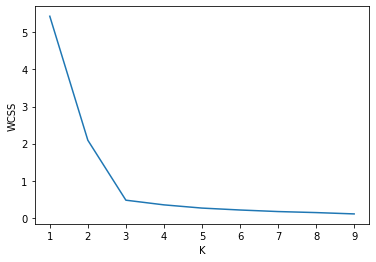

In [39]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_ran,wcss)

In [20]:
model = KMeans(3)

In [23]:
y_predicted = model.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [24]:
data['Cluster'] = y_predicted

In [26]:
data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [28]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [36]:
data_1 = data[data.Cluster==0]
data_2 = data[data.Cluster==1]
data_3 = data[data.Cluster==2]

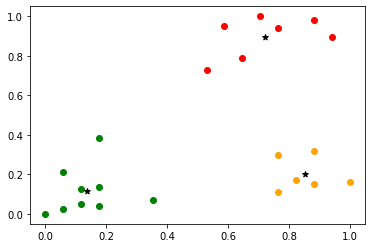

In [53]:
plt.scatter(data_1['Age'],data_1['Income($)'],color='green')
plt.scatter(data_2['Age'],data_2['Income($)'],color='red')
plt.scatter(data_3['Age'],data_3['Income($)'],color='orange')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],label="centroid" ,marker="*",color="black")